### CoderByte Task

Using Reinforcement Learning, train an agent to play Cartpole V1 (OpenAI Gym environment).

Cite all used resources used for your work.

Requirements
1. Code is bug-free.

2. Mean reward above 475 on the last 100 episodes

3. Graph mean reward over episodes

### Files Explanation
Different files were used for different purposes. 

The learning.ipynb is filled with notes from learning how to do reinforcement learning

The testing.ipynb is filled with testing each function and making sure everything works

The main.ipynb (this file) is a cleaned up version for using and training for perfect scores on CartPole simulation


#### Package + Model/Algorithm Choice

As I am learning reinforcement learning it makes sense to start with an package that helps simplify the process before getting into custom modules with PyTorch or Tensorflow.
The decision was between Ray's RLlib or StableBaseline3. Both seemed like good choices but StableBaseline3 seemed more developed and overall a better choice for this project.

Our observation space is a Box type, while the action space is a Discrete(2) type. 
So the algorithms that fit our needs are:
- A2C (synchronous, deterministic variant of Asynchronous Advantage Actor Critic)
- DQN (Deep Q Network)
- PPO (Proximal Policy Optimization)

I will try all algorithms and compare

In [1]:
import os
import gym
import numpy as np
import pandas as pd
from stable_baselines3 import PPO 
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv  
from stable_baselines3.common import results_plotter
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.dqn import DQN


In [2]:
class rl_model:

    """
    Creating gym environment and create model
    """
    def __init__(self,model_type ,env_name : str  ,unique_dir_name : str)-> None:
        self.log_dir = "/tmp/"+unique_dir_name
        os.makedirs(self.log_dir, exist_ok=True)
        self.log_path = os.path.join("Logs","logs"+unique_dir_name)
        self.tmp_path = os.path.join("Logs","tmp"+unique_dir_name)

        env = gym.make(env_name)
        env = Monitor(env, self.log_dir)
        env = DummyVecEnv([lambda: env])
        logger = configure(self.tmp_path, ["stdout", "csv"])

        self.env = env 
        # Changing verbose to 0 because Github doesn't shorten long outputs.
        self.model = model_type('MlpPolicy',self.env,verbose = 0) #verbose 1 = info , 2 = debug
        self.model.set_logger(logger)

    def learn(self,timesteps: int) -> None:
        self.model.learn(total_timesteps=timesteps)
    
    """
    Run simulation and get score on a number of episodes 
    """
    def evaluate_model(self, ep_num: int)-> None: 
        episodes = ep_num
        score_mean = []
        for episode in range(1,episodes+1):
            obs = self.env.reset() #resetting observation instead
            done = False
            score = 0

            while not done:
                self.env.render()
                action,_ = self.model.predict(obs)  #model predicting based on observation
                obs, reward,done,info = self.env.step(action)  #making action based on models choice
                score += reward
            print('Episode:{} Score:{}'.format(episode,score))
            score_mean.append(score[0])
        print('Average Score {}'.format(np.mean(score_mean)))
        self.env.close()

    def plot_results(self)-> None:
        #plot over episodes
        results_plotter.plot_results([self.log_dir], 1e5, results_plotter.X_EPISODES, "CartPole-v1")

        #plot with y axis as ep_rew_mean : average reward over last 100 episodes
        df = pd.read_csv(os.path.join(self.tmp_path,'progress.csv'))
        df.plot('time/total_timesteps','rollout/ep_rew_mean')

        


In [3]:
ppo_model = rl_model(PPO,'CartPole-v1','ppo1')
ppo_model.learn(100000)

Logging to Logs\tmpppo1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.8     |
|    ep_rew_mean     | 21.8     |
| time/              |          |
|    fps             | 2969     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.9        |
|    ep_rew_mean          | 26.9        |
| time/                   |             |
|    fps                  | 1900        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008883654 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00922    |
|    l

Episode:1 Score:[500.]
Episode:2 Score:[500.]
Episode:3 Score:[500.]
Episode:4 Score:[500.]
Episode:5 Score:[500.]
Average Score 500.0


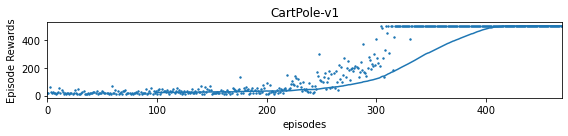

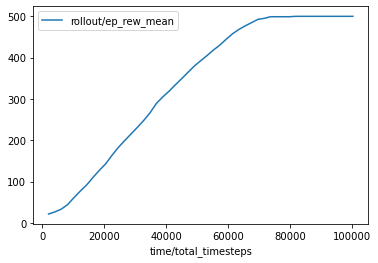

In [4]:
ppo_model.evaluate_model(5)
ppo_model.plot_results()

#### We can see that the reward stays at 500 for at least 100 episodes


### Trying A2C algorithm instead

Logging to Logs\tmpa2c
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 30       |
|    ep_rew_mean        | 30       |
| time/                 |          |
|    fps                | 1391     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.674   |
|    explained_variance | -1.32    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.91     |
|    value_loss         | 17.2     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 30.3     |
|    ep_rew_mean        | 30.3     |
| time/                 |          |
|    fps                | 1403     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/       

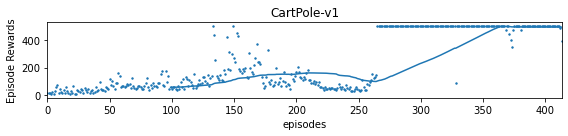

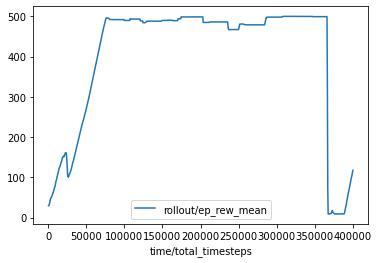

In [5]:
a2c_model = rl_model(A2C ,'CartPole-v1','a2c')
a2c_model.learn(400000)
a2c_model.evaluate_model(10)
a2c_model.plot_results()

#### Try DQN Algorithm

Logging to Logs\tmpdqn
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 653      |
|    time_elapsed     | 0        |
|    total_timesteps  | 85       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.5     |
|    ep_rew_mean      | 19.5     |
|    exploration_rate | 0.998    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1154     |
|    time_elapsed     | 0        |
|    total_timesteps  | 156      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.997    |
| time/               |         

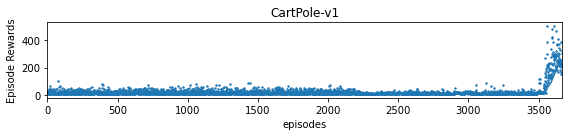

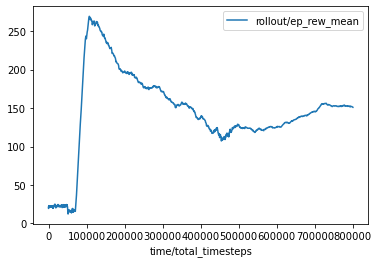

In [6]:
a2c_model = rl_model(DQN ,'CartPole-v1','dqn')
a2c_model.learn(800000)
a2c_model.evaluate_model(10)
a2c_model.plot_results()

#### Performance comparison
PPO>A2C>DQN\
PPO was able to achieve a perfect score much faster than the other 2 algorithms. 
The other two algorithms strangley took very long to learn and then perhaps overfitted and began performing worse.\
PPO is the best choice.

Limitations of StableBaselines3:\
Stable Baselines likes to use timestep instead of episodes.\
The logger didn't log time in episodes even though it was in the documentation.\
All I could do was plot over episodes with respect to Episode reward instead.


Future Optimization:
Hyperparameter tuning with Optuna.\ 
Could've added callbacks to early stop. But in my testing of the callback function, the early stop wasn't reflective of how much it learned on average. So it wasn't a great tool in StableBaselines3. 


#### Citations
https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html\
https://stable-baselines3.readthedocs.io/en/master/guide/callbacks.html\
https://github.com/hill-a/stable-baselines/blob/master/stable_baselines/bench/monitor.py#L13\
https://colab.research.google.com/github/Stable-Baselines-Team/rl-colab-notebooks/blob/sb3/monitor_training.ipynb#scrollTo=h_kMEHmJm3P3\
https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html\
https://stable-baselines3.readthedocs.io/en/master/modules/a2c.html\
https://www.youtube.com/watch?v=Mut_u40Sqz4\
https://stable-baselines.readthedocs.io/en/master/_modules/stable_baselines/results_plotter.html
